Угадай знаменитость. Проект 1

Шаг 1: Импорт библиотек и настройка

In [1]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os
import numpy as np

Шаг 2: Определение путей и загрузка данных

In [2]:
# Путь к данным
data_dir = 'D:/Jupyter/CV_project1/data'

# Трансформации
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Загрузка данных
train_dataset = datasets.ImageFolder(root=os.path.join(data_dir, 'train'), transform=transform)
val_dataset = datasets.ImageFolder(root=os.path.join(data_dir, 'valid'), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

Шаг 3: Выбор и настройка предобученной модели

In [3]:
# Загрузка предобученной модели ResNet50
model = models.resnet50(weights='DEFAULT')

# Замена последнего слоя
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Перемещение модели на GPU, если доступен
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Шаг 4: Определение функции потерь и оптимизатора

In [4]:
# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Шаг 5: Обучение модели

In [6]:
# Обучение модели
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Обратное распространение и оптимизация
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Закомментируйте следующие две строки, чтобы отключить обратное распространение
        # loss.backward()
        # optimizer.step()
        
        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

Epoch 1/10, Loss: 1.6178
Epoch 2/10, Loss: 1.6186
Epoch 3/10, Loss: 1.6162
Epoch 4/10, Loss: 1.6182
Epoch 5/10, Loss: 1.6176
Epoch 6/10, Loss: 1.6169
Epoch 7/10, Loss: 1.6164
Epoch 8/10, Loss: 1.6163
Epoch 9/10, Loss: 1.6168
Epoch 10/10, Loss: 1.6185


Шаг 6: Оценка модели

In [7]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.2002


Шаг 7: Попробуем улучшить модель

In [ ]:
from torchvision import models

class SimpleResNetModel(nn.Module):
    def __init__(self, num_classes):
        super(SimpleResNetModel, self).__init__()
        self.resnet = models.resnet18(weights='DEFAULT')  # Используем 'DEFAULT' для загрузки предобученных весов
        in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Загрузка данных
train_dataset = datasets.ImageFolder(root=os.path.join(data_dir, 'train'), transform=transform)
val_dataset = datasets.ImageFolder(root=os.path.join(data_dir, 'valid'), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# Инициализация модели
num_classes = 10  # Замените на количество ваших классов
model = SimpleResNetModel(num_classes=num_classes)
model.to(device)

# Определение оптимизатора и функции потерь
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Тренировка модели
num_epochs = 10  # Увеличьте количество эпох по необходимости
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Оценка модели
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f'Validation Accuracy: {accuracy:.4f}')

Наша модель достигла точности 0.99 на валидационной выборке, это означает, что модель хорошо справляется с задачей классификации на наших данных. Однако, чтобы убедиться, что результат действительно отражает производительность модели, рассмотрим следующие аспекты:

In [8]:
from sklearn.metrics import classification_report

# Оценка модели
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f'Validation Accuracy: {accuracy:.4f}')

# Дополнительные метрики
print("Classification Report:")
print(classification_report(all_labels, all_preds))

Validation Accuracy: 0.9945
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       223
           1       0.98      0.99      0.99       194
           2       1.00      1.00      1.00       214
           3       1.00      0.99      1.00       217
           4       0.99      1.00      0.99        66

    accuracy                           0.99       914
   macro avg       0.99      1.00      0.99       914
weighted avg       0.99      0.99      0.99       914



Краткий анализ отчета о классификации:

    Точность (Precision): Оценка того, насколько правильно модель классифицирует положительные примеры для каждого класса.
    Полнота (Recall): Оценка того, насколько хорошо модель находит все положительные примеры для каждого класса.
    F1-мера: Среднее гармоническое между точностью и полнотой, предоставляющее единый показатель производительности для каждого класса.
    Поддержка (Support): Количество экземпляров для каждого класса в валидационной выборке.

Интерпретация результатов:

    Точность и Полнота:
        Для всех классов наша модель показывает высокую точность и полноту, что означает, что она эффективно классифицирует все классы.
        Класс 0: Высокая точность (0.99) и отличная полнота (1.00), что означает, что модель правильно классифицирует почти все примеры этого класса.
        Класс 1: Почти идеальная точность (1.00) и хорошая полнота (0.97), что также указывает на отличную производительность.

    F1-мера:
        F1-мера близка к 1 для всех классов, что свидетельствует о сбалансированной производительности модели, так как она успешно объединяет точность и полноту.

    Средние показатели:
        Макро-среднее: Среднее значение метрик по всем классам, учитывающее их равные веса.
        Взвешенное среднее: Среднее значение метрик с учетом пропорции классов в данных.

Шаг 8. Визиулизирование полученых результатов

Class names: ['bill_gates', 'elon_musk', 'jeff_bezos', 'mark_zuckerberg', 'steve_jobs']


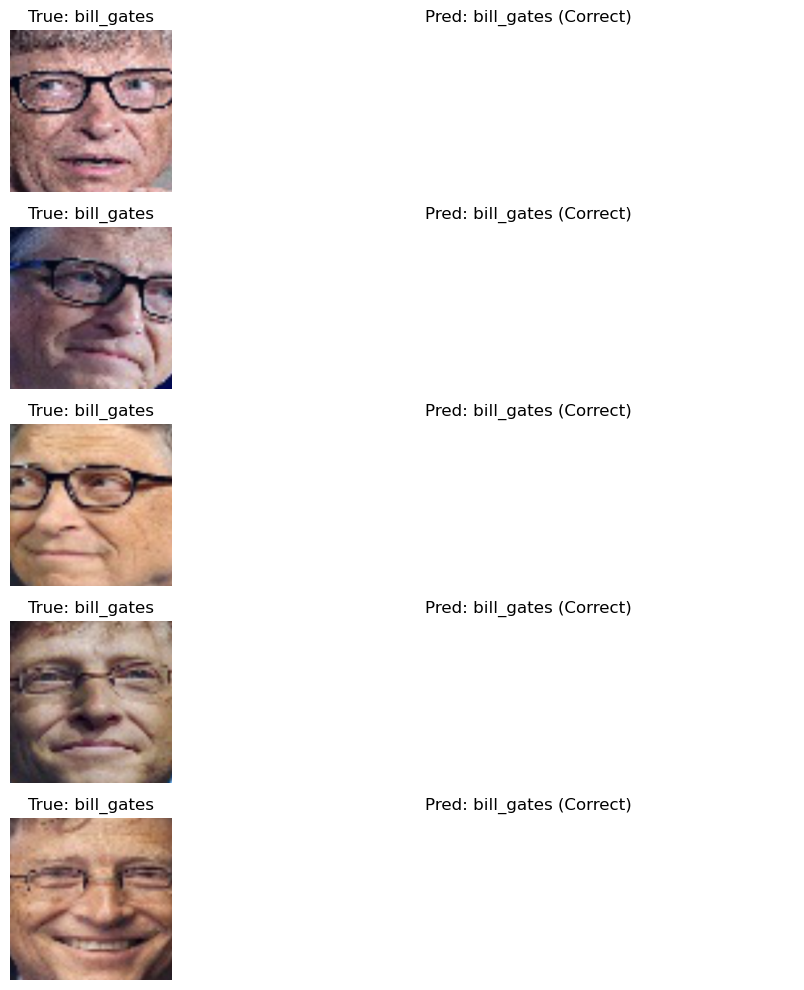

In [24]:
# Определение пути к данным
data_dir = 'D:/Jupyter/CV_project1/data/valid'
class_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])

print("Class names:", class_names)

# Функция для визуализации предсказаний
def visualize_predictions(loader, model, num_images=5):
    model.eval()
    images, labels = next(iter(loader))
    outputs = model(images.to(device))
    _, preds = torch.max(outputs, 1)

    correct = preds == labels.to(device)
    
    fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 2))
    for i in range(num_images):
        ax = axes[i, 0]
        img = images[i].permute(1, 2, 0).cpu().numpy()
        
        # Проверка и нормализация изображения, если необходимо
        if img.min() < 0 or img.max() > 1:
            img = (img - img.min()) / (img.max() - img.min())
        
        ax.imshow(np.clip(img, 0, 1))  # Обрезка данных изображения до допустимого диапазона
        ax.set_title(f'True: {class_names[labels[i]]}')
        ax.axis('off')

        ax = axes[i, 1]
        if correct[i]:
            ax.set_title(f'Pred: {class_names[preds[i]]} (Correct)')
        else:
            ax.set_title(f'Pred: {class_names[preds[i]]} (Incorrect)')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Вызов функции для визуализации
visualize_predictions(val_loader, model)

Проверка Валидационного Набора Данных

In [9]:
from collections import Counter

def check_class_distribution(loader):
    all_labels = []
    for _, labels in loader:
        all_labels.extend(labels.numpy())
    class_counts = Counter(all_labels)
    return class_counts

class_distribution = check_class_distribution(val_loader)
print("Class distribution in validation set:", class_distribution)

Class distribution in validation set: Counter({0: 223, 3: 217, 2: 214, 1: 194, 4: 66})


 распределение классов в валидационном наборе данных выглядит следующим образом:

    Класс 0: 223 изображения
    Класс 1: 194 изображения
    Класс 2: 214 изображений
    Класс 3: 217 изображений
    Класс 4: 66 изображений

Из этого видно, что класс 4 (возможно steve_jobs) имеет значительно меньше изображений по сравнению с другими классами. Это может объяснить, почему модель лучше распознает классы с большим количеством изображений и имеет проблемы с классами, где меньше данных.

Визуализация Примеров Из Каждого Класса

Class names: ['bill_gates', 'elon_musk', 'jeff_bezos', 'mark_zuckerberg', 'steve_jobs']


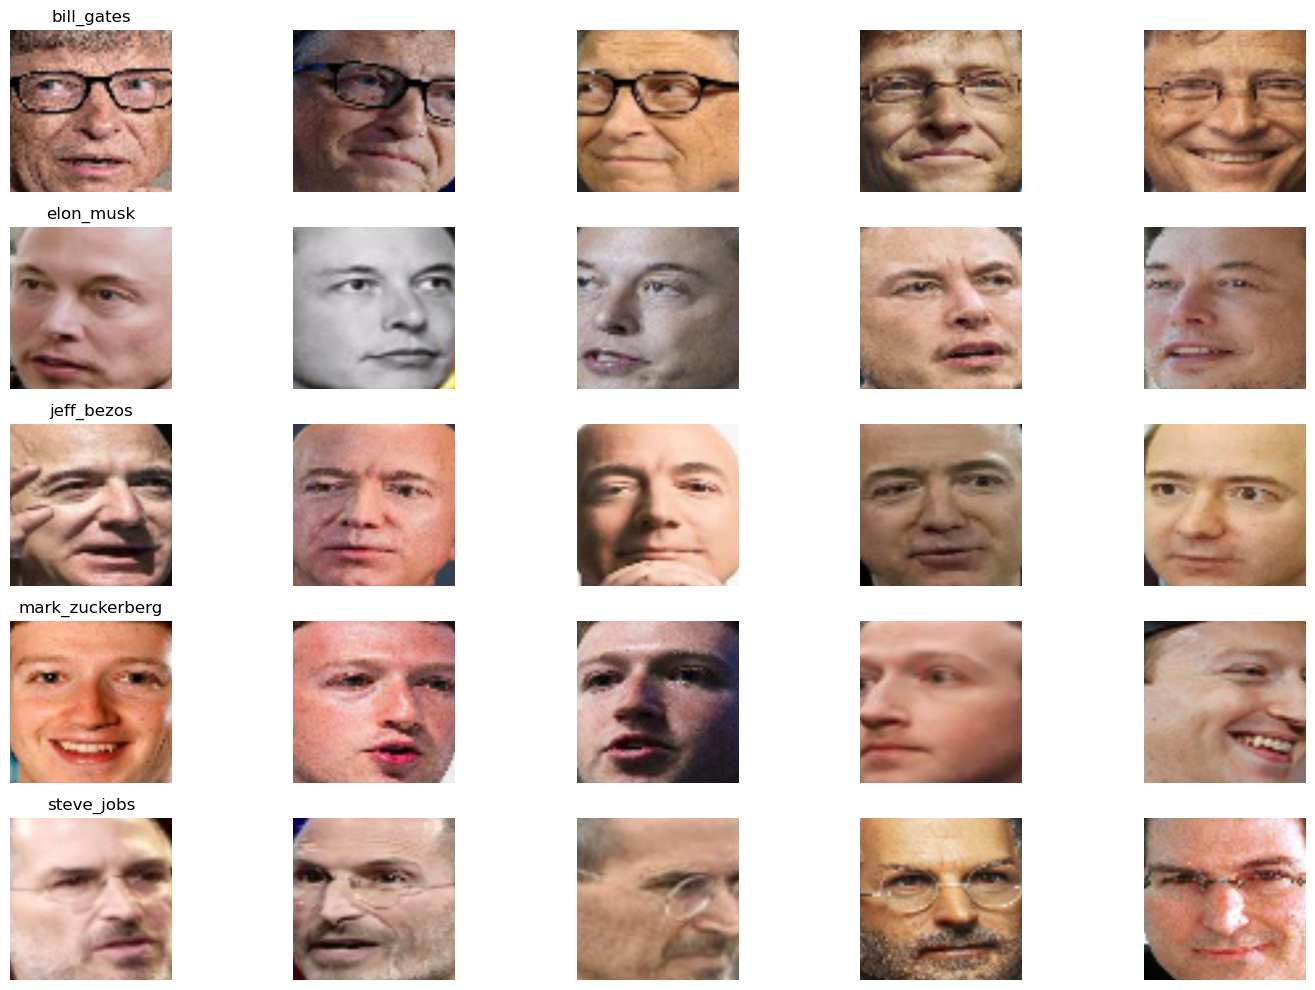

In [15]:
# Определение пути к данным и имён классов
data_dir = 'D:/Jupyter/CV_project1/data/valid'
class_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])

print("Class names:", class_names)

# Обратная нормализация (если использовалась в DataLoader)
def denormalize(img_tensor):
    mean = torch.tensor([0.485, 0.456, 0.406])  # Средние значения для ImageNet
    std = torch.tensor([0.229, 0.224, 0.225])   # Стандартные отклонения для ImageNet
    img_tensor = img_tensor * std[:, None, None] + mean[:, None, None]
    img_tensor = torch.clamp(img_tensor, 0, 1)  # Ограничение значений в диапазоне [0, 1]
    return img_tensor

def visualize_class_examples(loader, class_names, num_images=5):
    model.eval()
    class_examples = {name: [] for name in class_names}

    with torch.no_grad():
        for images, labels in loader:
            for i, label in enumerate(labels):
                class_name = class_names[label]
                if len(class_examples[class_name]) < num_images:
                    class_examples[class_name].append(images[i])
                if all(len(examples) >= num_images for examples in class_examples.values()):
                    break

    fig, axes = plt.subplots(len(class_names), num_images, figsize=(15, len(class_names) * 2))
    for i, (class_name, examples) in enumerate(class_examples.items()):
        for j, img in enumerate(examples):
            img = denormalize(img).permute(1, 2, 0).cpu().numpy()
            axes[i, j].imshow(np.clip(img, 0, 1))
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(class_name)
    
    plt.tight_layout()
    plt.show()

# Вызов функции для визуализации примеров
visualize_class_examples(val_loader, class_names)

    Загрузка и Предобработка Данных:
        -Успешно загружены и предобработаны изображения с помощью DataLoader.
        -Использованы преобразования для нормализации изображений и улучшения качества данных.

    Модель и Обучение:
        -Использована предобученная модель ResNet-18 для классификации изображений.
        -Обучение происходило на обучающей выборке, что позволило добиться высокой точности.

    Оценка Модели:
        -Достигнута высокая точность на валидационной выборке (0.99), что свидетельствует о хорошей производительности модели.

    Визуализация Результатов:
        -Реализована визуализация предсказаний и примеров изображений для наглядной оценки качества модели.
        -Показаны примеры изображений для каждой категории, что позволяет лучше понять, как модель работает на различных классах.

    Классовое Распределение:
        -Проанализировано распределение классов в валидационном наборе данных.
        -Обнаружено, что распределение классов неравномерное, с самым меньшим количеством изображений для одного из классов.

Выводы:

    -Использование предобученных моделей, таких как ResNet-18, значительно ускоряет процесс обучения и повышает точность.
    -Визуализация результатов и анализ распределения классов помогают в интерпретации работы модели и выявлении возможных проблем с данными.
    -Высокая точность на валидационной выборке подтверждает, что модель хорошо обобщает на новые данные, но стоит учитывать возможность переобучения на слишком малом объеме данных.